In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from CIPEC import *

[Qibo 0.2.16|INFO|2025-02-24 22:34:27]: Using numpy backend on /CPU:0


# 1) Single-qubit basis

In [13]:
# 1-qubit CPTP maps (including T)
B = noiseless_basis(1,include_T=True)

G = gram_matrix(list(B.values()))
# fancy_display(G,'G')
if np.linalg.matrix_rank(G)==len(B):
    print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{[".".join(k) for k in list(B.keys())]}")

    print(f'\nHere are their Choi matrices:')
    for k,v in B.items():
        fancy_display(v," ".join(k))

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"

The following 13 channels form a basis of 1q CPTP maps:
['I', 'H', 'S', 'T', 'H.S', 'H.T', 'S.H', 'T.H', 'H.S.H', 'S.H.T', 'Px', 'Py', 'Pz']

Here are their Choi matrices:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
# 1-qubit CPTP maps (only Cliffords)
B = noiseless_basis(1,include_T=False)

G = gram_matrix(list(B.values()))
#disp(G)
if np.linalg.matrix_rank(G)==len(B):
    print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{[".".join(k) for k in list(B.keys())]}")

    print(f'\nHere are their Choi matrices:')
    for k,v in B.items():
        fancy_display(v," ".join(k))

Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"

The following 13 channels form a basis of 1q CPTP maps:
['I', 'H', 'S', 'H.S', 'S.H', 'S.S', 'H.S.H', 'H.S.S', 'S.H.S', 'S.H.S.S', 'Px', 'Py', 'Pz']

Here are their Choi matrices:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
B_T = noiseless_basis(1,include_T=True)
B_Cliff = noiseless_basis(1,include_T=False)

# U = gates.UnitaryChannel(0,[(1.,qi.random_unitary(2))]).to_choi()
U = gates.UnitaryChannel(0,[(1.,gates.T(0).matrix())]).to_choi()
print()
fancy_display(U,'U')

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    c = decomposition_coefficients(U, B)
    negativity = np.linalg.norm(c,1)
    
    #sanity check
    U_expanded = np.sum([c[i]*list(B.values())[i] for i in range(len(B))],0)
    error = np.linalg.norm(U-U_expanded)
    print(f'\n--------- {name} basis decomposition:\n')
    fancy_display(c.reshape(1,-1),'c')
    print(f'Non-null components at {[" ".join(list(B.keys())[i]) for i in np.where(np.abs(c)>1e-4)[0]]}')
    fancy_display(negativity,'|c|_1')

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"



<IPython.core.display.Latex object>


--------- Clifford+T basis decomposition:



<IPython.core.display.Latex object>

Non-null components at ['T']


<IPython.core.display.Latex object>


--------- Clifford basis decomposition:



<IPython.core.display.Latex object>

Non-null components at ['I', 'S', 'S S']


<IPython.core.display.Latex object>

Loaded pre-computed basis "1qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "1qbasis_cliff_noiseless.csv"

--------- Clifford+T basis decomposition:

mean(|c|_1)=20.03, var(|c|_1)=274.54

--------- Clifford basis decomposition:

mean(|c|_1)=4.11, var(|c|_1)=7.08


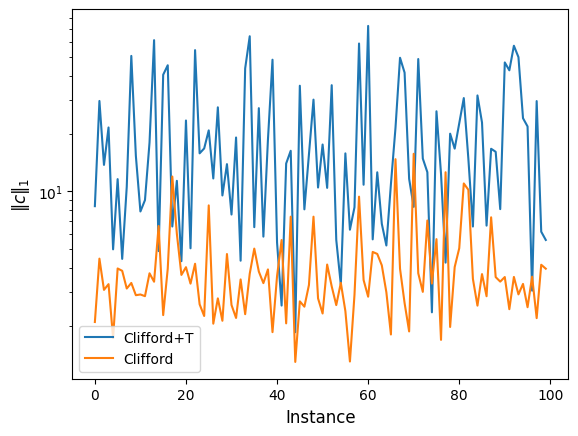

In [12]:
# comparing the negativity of the two bases
n_samples = 100

B_T = noiseless_basis(1,include_T=True)
B_Cliff = noiseless_basis(1,include_T=False)

plt.figure()
legends = []

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel(0,[(1.,qi.random_unitary(2))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'\n--------- {name} basis decomposition:\n\nmean(|c|_1)={np.mean(negativity).round(2)}, var(|c|_1)={np.var(negativity).round(2)}')
    plt.plot(negativity)
    legends.append(name)

plt.xlabel('Instance',fontsize='large')
plt.ylabel(r'$\|c\|_1$',fontsize='large')
plt.yscale('log')
plt.legend(legends);

# 2) Two-qubit basis

In [206]:
# 2-qubit CPTP maps (including T)
B = noiseless_basis(2,include_T=True)

print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n\n{[".".join(k) for k in list(B.keys())]}")
# print(f'\nHere are their Choi matrices:')
# for v in B.values():
#     print(f'{np.round(v,2)}')

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"

The following 241 channels form a basis of 1q CPTP maps:

['II', 'IH', 'IS', 'IT', 'HI', 'HH', 'HS', 'HT', 'SI', 'SH', 'SS', 'ST', 'TI', 'TH', 'TS', 'TT', 'CX', 'IH.IS', 'IH.IT', 'IH.HS', 'IH.HT', 'IH.SS', 'IH.ST', 'IH.TS', 'IH.TT', 'IH.CX', 'IS.IH', 'IS.HH', 'IS.SH', 'IS.TH', 'IS.CX', 'IT.IH', 'IT.HH', 'IT.SH', 'IT.TH', 'IT.CX', 'HI.SI', 'HI.SH', 'HI.SS', 'HI.ST', 'HI.TI', 'HI.TH', 'HI.TS', 'HI.TT', 'HI.CX', 'HH.SS', 'HH.ST', 'HH.TS', 'HH.TT', 'HH.CX', 'HS.SH', 'HS.TH', 'HS.CX', 'HT.SH', 'HT.TH', 'HT.CX', 'SI.HI', 'SI.HH', 'SI.HS', 'SI.HT', 'SI.CX', 'SH.HS', 'SH.HT', 'SH.CX', 'SS.HH', 'SS.CX', 'ST.HH', 'ST.CX', 'TI.HI', 'TI.HH', 'TI.HS', 'TI.HT', 'TI.CX', 'TH.HS', 'TH.HT', 'TH.CX', 'TS.HH', 'TS.CX', 'TT.HH', 'TT.CX', 'CX.IH', 'CX.IS', 'CX.HI', 'CX.HH', 'CX.HS', 'CX.HT', 'CX.SH', 'CX.SS', 'CX.TH', 'CX.TS', 'IH.IS.IH', 'IH.IS.HH', 'IH.IS.SH', 'IH.IS.TH', 'IH.IS.CX', 'IH.IT.CX', 'IH.HS.SH', 'IH.HS.TH', 'IH.HS.CX', 'IH.HT.CX', 

In [207]:
# 2-qubit CPTP maps (excluding T)
B = noiseless_basis(2,include_T=False)

print(f"\nThe following {len(B)} channels form a basis of 1q CPTP maps:\n{[".".join(k) for k in list(B.keys())]}\n")
# print(f'\nHere are their Choi matrices:')
# for v in B.values():
#     print(f'{np.round(v,2)}')

Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"

The following 241 channels form a basis of 1q CPTP maps:
['II', 'IH', 'IS', 'HI', 'HH', 'HS', 'SI', 'SH', 'SS', 'CX', 'IH.IS', 'IH.HS', 'IH.SS', 'IH.CX', 'IS.IH', 'IS.IS', 'IS.HH', 'IS.HS', 'IS.SH', 'IS.SS', 'IS.CX', 'HI.SI', 'HI.SH', 'HI.SS', 'HI.CX', 'HH.SS', 'HH.CX', 'HS.SH', 'HS.SS', 'HS.CX', 'SI.HI', 'SI.HH', 'SI.HS', 'SI.SI', 'SI.SH', 'SI.SS', 'SI.CX', 'SH.HS', 'SH.SS', 'SH.CX', 'SS.HH', 'SS.HS', 'SS.SH', 'SS.SS', 'SS.CX', 'CX.IH', 'CX.IS', 'CX.HI', 'CX.HH', 'CX.HS', 'CX.SH', 'CX.SS', 'IH.IS.IH', 'IH.IS.IS', 'IH.IS.HH', 'IH.IS.HS', 'IH.IS.SH', 'IH.IS.SS', 'IH.IS.CX', 'IH.HS.SH', 'IH.HS.SS', 'IH.HS.CX', 'IH.SS.HH', 'IH.SS.HS', 'IH.SS.SH', 'IH.SS.SS', 'IH.SS.CX', 'IH.CX.IH', 'IH.CX.IS', 'IH.CX.HI', 'IH.CX.HH', 'IH.CX.HS', 'IH.CX.SH', 'IH.CX.SS', 'IS.IH.IS', 'IS.IH.HS', 'IS.IH.SS', 'IS.IH.CX', 'IS.IS.CX', 'IS.HH.SS', 'IS.HH.CX', 'IS.HS.CX', 'IS.SH.HS', 'IS.CX.IH', 'IS.CX.IS', 'IS.CX.HI', 'IS.CX.HH', 'IS.CX.HS', 'HI.SI.HI', 'HI

In [214]:
B_T = noiseless_basis(2,include_T=True)
B_Cliff = noiseless_basis(2,include_T=False)

# U = gates.UnitaryChannel((0,1),[(1.,qi.random_unitary(4))]).to_choi()
U = gates.UnitaryChannel((0,1),[(1.,np.kron(gates.T(0).matrix(),gates.T(0).matrix()))]).to_choi()
print()
fancy_display(U,'U')

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    c = decomposition_coefficients(U, B)
    negativity = np.linalg.norm(c,1)
    
    #sanity check
    U_expanded = np.sum([c[i]*list(B.values())[i] for i in range(len(B))],0)
    error = np.linalg.norm(U-U_expanded)
    print(f'\n--------- {name} basis decomposition:\n')
    fancy_display(c.reshape(1,-1),'c')
    print(f'Non-null components at {[" ".join(list(B.keys())[i]) for i in np.where(np.abs(c)>1e-4)[0]]}')
    fancy_display(negativity,'|c|_1')

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"



<IPython.core.display.Latex object>


--------- Clifford+T basis decomposition:



<IPython.core.display.Latex object>

Non-null components at ['TT']


<IPython.core.display.Latex object>


--------- Clifford basis decomposition:



<IPython.core.display.Latex object>

Non-null components at ['II', 'IS', 'SI', 'SS', 'IS IS', 'IS SS', 'SI SI', 'SI SS', 'SS SS']


<IPython.core.display.Latex object>

Loaded pre-computed basis "2qbasis_cliffplusT_noiseless.csv"
Loaded pre-computed basis "2qbasis_cliff_noiseless.csv"

--------- Clifford+T basis decomposition:

mean(|c|_1)=3521.23, var(|c|_1)=2101.32

--------- Clifford basis decomposition:

mean(|c|_1)=616.99, var(|c|_1)=355.08


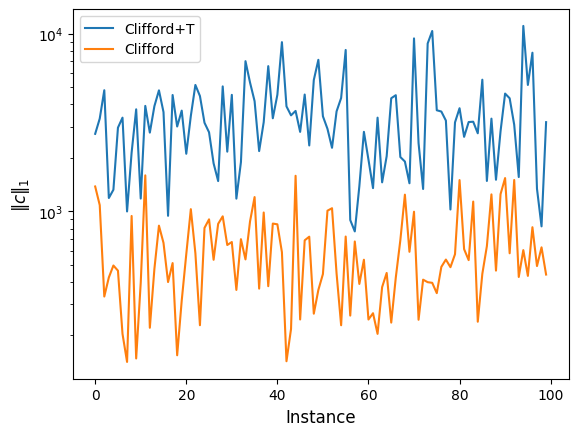

In [216]:
# comparing the negativity of the two bases
n_samples = 100

B_T = noiseless_basis(2,include_T=True)
B_Cliff = noiseless_basis(2,include_T=False)

plt.figure()
legends = []

for name,B in [('Clifford+T',B_T), ('Clifford',B_Cliff)]:
    negativity = []
    for i in range(n_samples):
        U = gates.UnitaryChannel((0,1),[(1.,qi.random_unitary(4))]).to_choi()
        c = decomposition_coefficients(U, B)
        negativity.append(np.linalg.norm(c,1))
    print(f'\n--------- {name} basis decomposition:\n\nmean(|c|_1)={np.mean(negativity).round(2)}, var(|c|_1)={np.sqrt(np.var(negativity)).round(2)}')
    plt.plot(negativity)
    legends.append(name)

plt.xlabel('Instance',fontsize='large')
plt.ylabel(r'$\|c\|_1$',fontsize='large')
plt.yscale('log')
plt.legend(legends);